In [636]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import imread
import pandas as pd
import numpy as np
from PIL import Image
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 21.1 ms


In [619]:
df = pd.read_csv('new_waldo64.csv') # read in the data

time: 27.1 s


In [620]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size=0.2,random_state=32)
X_train = train_set.drop('waldo',axis=1)
y_train = train_set['waldo']
X_test = test_set.drop('waldo',axis=1)
y_test = test_set['waldo']

time: 1.21 s


First, calculate the eigenvectors and eigenvalues of the covarience matrix.

In [393]:
# !!!DO NOT RUN; takes ~30mins
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = X_train.values
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



time: 31min 38s


In [428]:
trace1 = go.Scatter(
    x=list(range(784)),
    y= np.real(cum_var_exp),
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
    hoverinfo= np.real(cum_var_exp),
    line=dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= np.real(var_exp),
    mode='lines+markers',
    name="'Individual Explained Variance'",
    hoverinfo= np.real(var_exp),
    line=dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2,1,1)
fig.layout.title = 'Explained Variance plots - Full and Zoomed-in'
fig.layout.xaxis = dict(range=[0, 80], title = 'Feature columns')
fig.layout.yaxis = dict(range=[0, 60], title = 'Explained Variance')
fig['data'] += [go.Scatter(x= list(range(784)) , y=np.real(cum_var_exp), xaxis='x2', yaxis='y2', name = 'Cumulative Explained Variance')]
fig['data'] += [go.Scatter(x=list(range(784)), y=np.real(var_exp), xaxis='x2', yaxis='y2',name = 'Individual Explained Variance')]

# fig['data'] = data
# fig['layout'] = layout
# fig['data'] += data2
# fig['layout'] += layout2
py.iplot(fig, filename='inset example')

This is the format of your plot grid:
[ (1,1) x1,y1 ]

With insets:
[ x2,y2 ] over [ (1,1) x1,y1 ]



time: 1.22 s


In [189]:
pca.n_components_
pca.components_.shape

(70, 12288)

In [190]:
np.sum(pca.explained_variance_ratio_)

0.48969886725568723

In [168]:
pca = PCA(n_components=0.95, whiten=True)
pca.fit_transform(X_train);

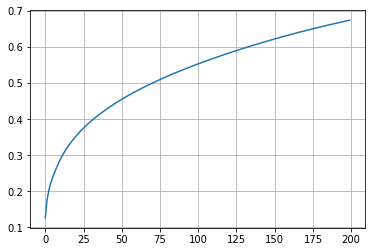

time: 180 ms


In [421]:
exp_var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(exp_var_cum.size), exp_var_cum)
plt.grid()

/usr/local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



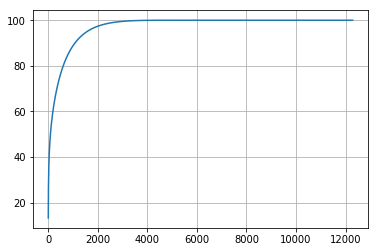

time: 165 ms


In [422]:
plt.plot(range(cum_var_exp.size), cum_var_exp)
plt.grid()
# plt.xlim(15,105)
# plt.ylim(0.6,0.95);

In [621]:
from sklearn.preprocessing import StandardScaler
X_std_train = StandardScaler().fit_transform(X_train)
X_std_test = StandardScaler().fit_transform(X_test)

pca = PCA(n_components=200, random_state=0, whiten=True)
pca.fit(X_std_train)
pca.fit(X_std_test)
X_train_pca = pca.transform(X_std_train)
X_test_pca = pca.transform(X_std_test)

time: 14.2 s


In [630]:
from sklearn.neighbors import KNeighborsClassifier
p=[]
tp = []
temp = []
# for i in range(1,5):
knn_pca = KNeighborsClassifier(n_neighbors=2,weights='distance', n_jobs=-1)
knn_pca.fit(X_train_pca, y_train)
train_score_pca = knn_pca.score(X_train_pca, y_train)
test_score_pca = knn_pca.score(X_test_pca, y_test)
p.append(knn_pca.predict(X_test_pca))
tp.append(knn_pca.predict(X_train_pca))
li = [i,train_score_pca,test_score_pca]
temp.append(li)
temp

[[1255, 1.0, 0.9156050955414012]]

time: 3.66 s


In [631]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, p[0])

array([[1068,   24],
       [  82,   82]])

time: 8.55 ms


In [632]:
kk = []
for i in range(len(y_test)):
    if p[0][i] == 1:
        kk.append(y_test.axes[0][i])

time: 4.19 ms


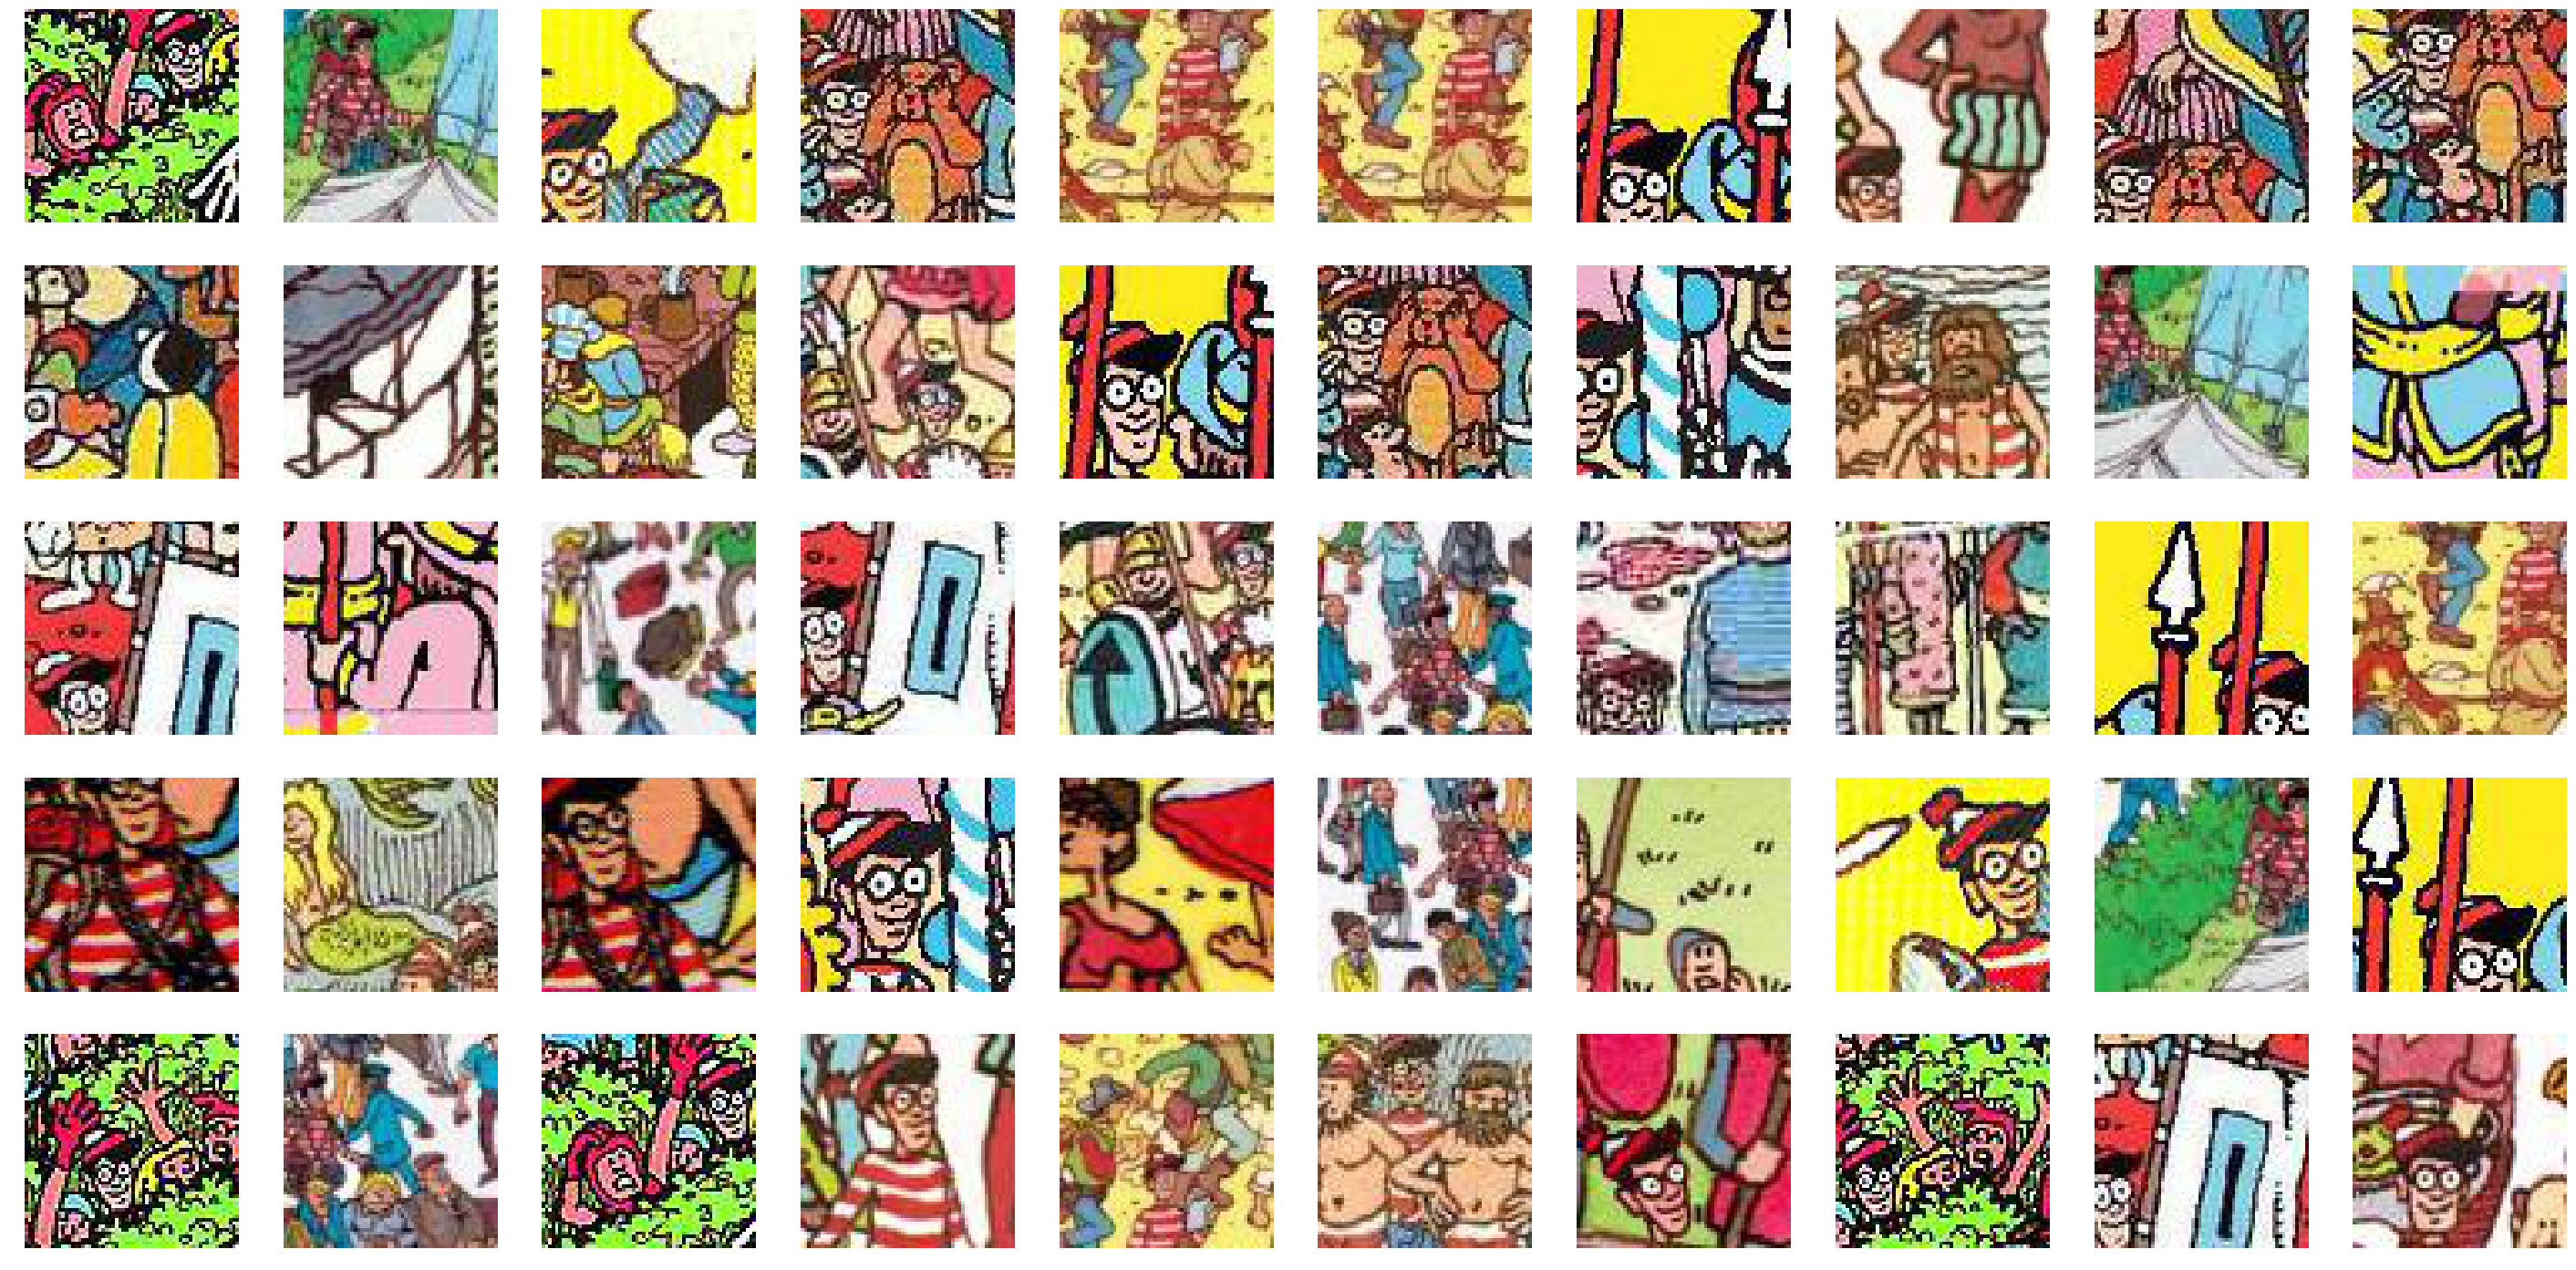

time: 5.53 s


In [633]:
plt.figure(figsize=(50,25))
for k in range(50):
    plt.subplot(5,10,k+1)
    plt.imshow(df.iloc[kk[k]].astype(np.uint8).drop('waldo').values.reshape(3, 64, 64).transpose().reshape(64,64, 3))
    plt.axis('off')

In [634]:
eigenvalues = []
for k in range(pca.components_.shape[0]-1):
    p = pca.components_[k].reshape(3, 64, 64).transpose().reshape(64,64, 3)
    eigenvalues.append(p)

time: 3.43 ms


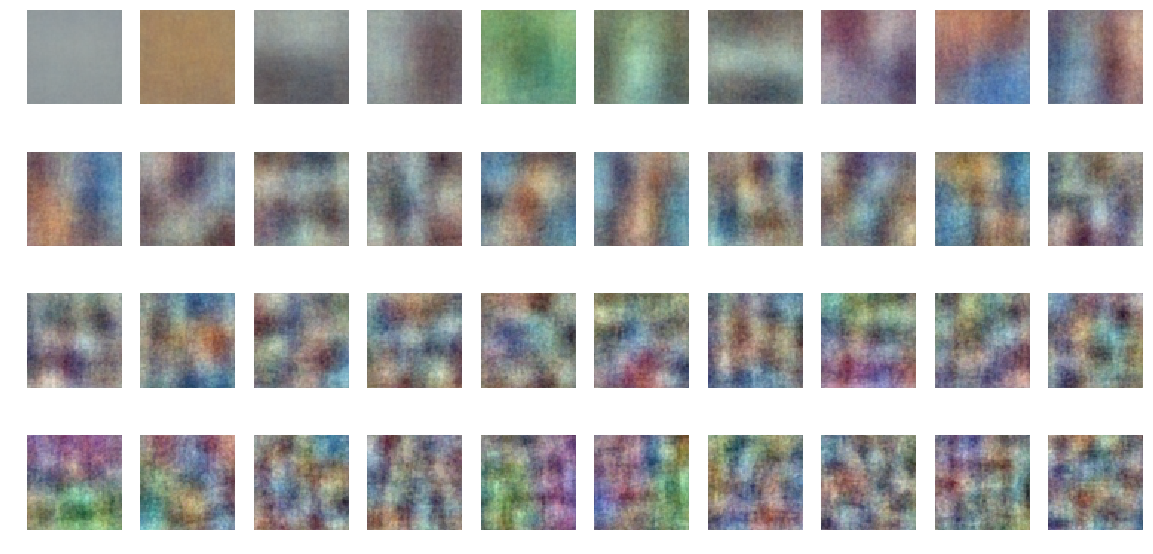

time: 2.85 s


In [635]:
scaled = (1/abs(2*np.min(pca.components_))) * pca.components_ + 0.5
plt.figure(figsize=(20,10))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(scaled[k].reshape(3, 64, 64).transpose().reshape(64,64,3), cmap='jet')
    plt.axis('off')

In [628]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

time: 4.87 ms


In [596]:
X_train_tsne = tsne.fit_transform(X_std_train) 
X_test_tsne = tsne.fit_transform(X_std_test) 

time: 14min 38s


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pp=[]
tpp = []
tempp = []
# for i in range(1,5):
knn_pca = KNeighborsClassifier(n_neighbors=1,weights='distance', n_jobs=-1)
knn_pca.fit(X_train_pca, y_train)
train_score_pca = knn_pca.score(X_train_pca, y_train)
test_score_pca = knn_pca.score(X_test_pca, y_test)
pp.append(knn_pca.predict(X_test_pca))
tpp.append(knn_pca.predict(X_train_pca))
li = [i,train_score_pca,test_score_pca]
tempp.append(li)
tempp

In [597]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pp[0])

NameError: name 'pp' is not defined

time: 9.53 ms


In [585]:
kkk = []
for i in range(len(y_test)):
    if pp[0][i] == 1:
        kkk.append(y_test.axes[0][i])

time: 2.72 ms


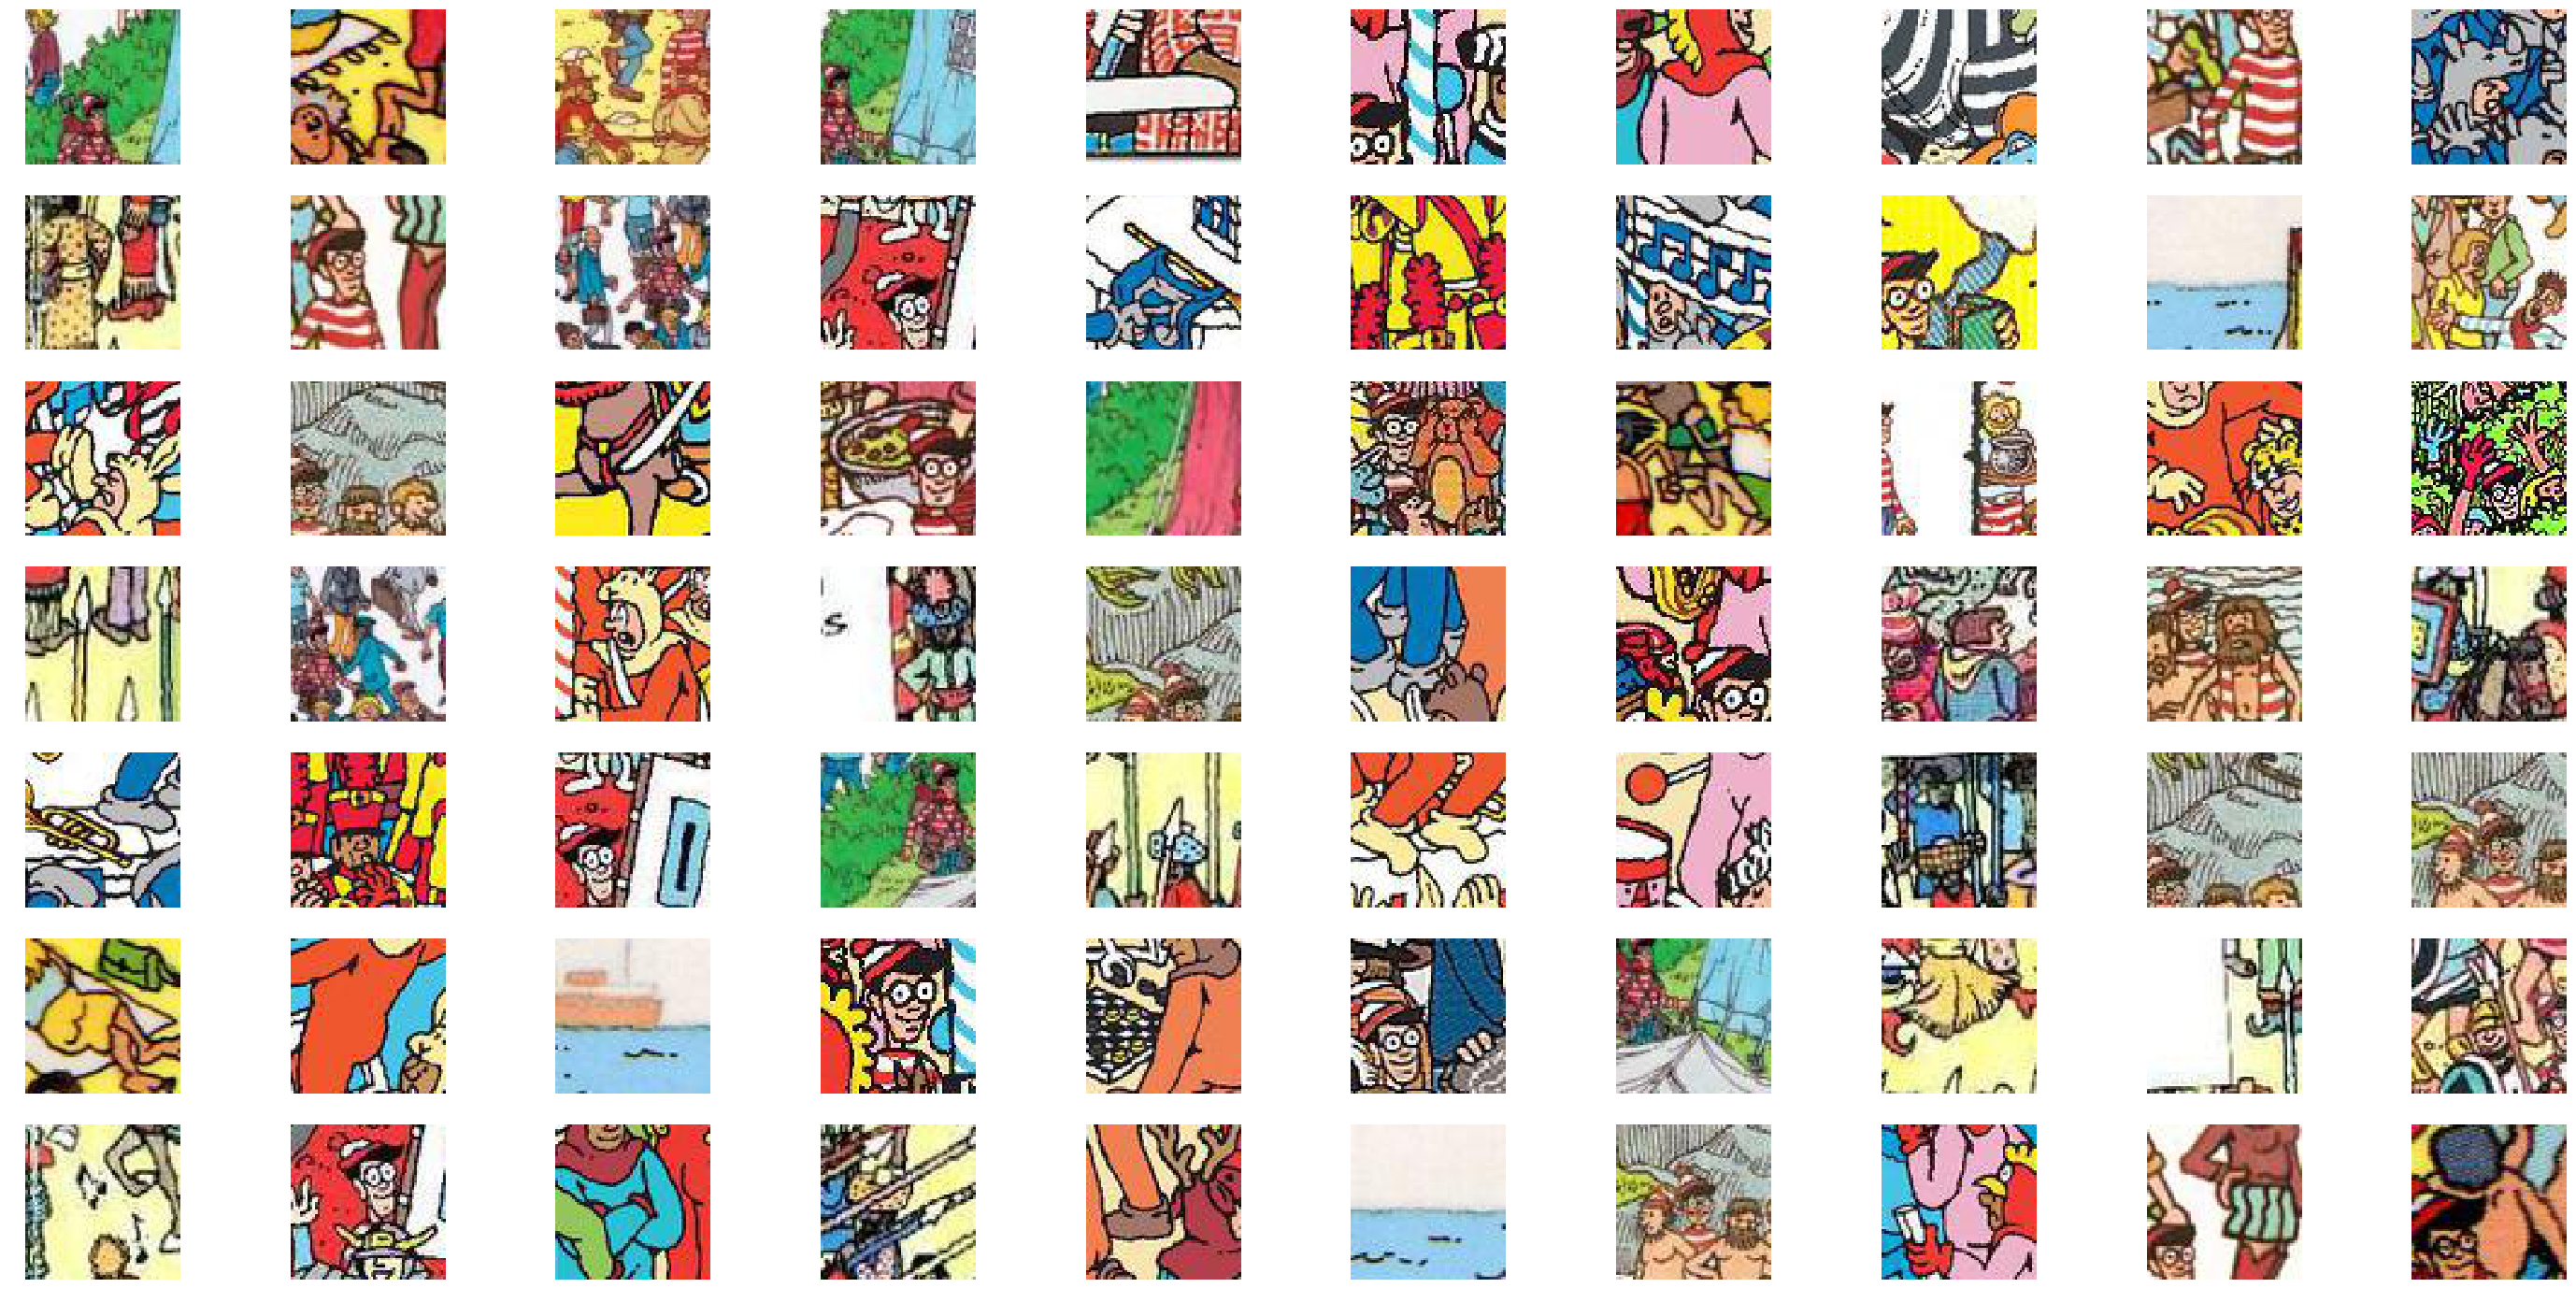

time: 6.54 s


In [590]:
plt.figure(figsize=(50,25))
for k in range(70):
    plt.subplot(7,10,k+1)
    plt.imshow(df.iloc[kkk[k]].astype(np.uint8).drop('waldo').values.reshape(3, 64, 64).transpose().reshape(64,64, 3))
    plt.axis('off')